In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment1.ipynb")

## Introduction to Pandas and Scikit-Learn

Pandas is a powerful data manipulation and analysis library for Python. It provides data structures like DataFrames and Series that allow for efficient handling of structured data. Pandas is particularly useful for tasks such as reading and writing data in various formats, data cleaning, merging datasets, and performing complex operations on data.

Scikit-learn, on the other hand, is a machine learning library for Python. It provides a wide range of supervised and unsupervised learning algorithms, as well as tools for model selection, evaluation, and preprocessing. Scikit-learn is designed to be user-friendly and efficient, making it a popular choice for both beginners and experienced data scientists.

Together, Pandas and Scikit-learn form a powerful combination for data analysis and machine learning tasks. Pandas is often used to prepare and manipulate data, which can then be fed into Scikit-learn models for training and prediction.

In this assignment, we'll start with the fundamentals of data loading/manipulatin in pandas, then move on to basics of scikit-learn.

## Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('adult.csv')

#### Let's take a quick look at the dataset. We'll use the .head() function to view the first 5 records of the dataset.

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Part 1: Data Loading and pre-processing

### Feel free to refer to the course notes on [pandas](https://tools4ds.github.io/DS701-Course-Notes/02B-Pandas.html) for the following questions.

**Question 1a**: Write a function `get_rows_and_columns` that takes as input a CSV filename, loads this file into a Pandas dataframe, and returns a tuple of the number of rows and columns in the dataframe.

In [5]:
def get_rows_and_columns(file_path):
    data = pd.read_csv(file_path)
    return data.shape

In [6]:
grader.check("q1a")

q1a results: All test cases passed!

**Question 1b**: Write a function `compute_missing_percentage` that converts '?' to NaN and returns the percentage of missing data (i.e., NaNs) for each column in the dataset.

In [7]:
def compute_missing_percentage(df:pd.DataFrame):
    res = df.apply(lambda x: x.replace('?', np.nan), axis = 0)
     
    return 100*(res.isna().sum()/len(res))

In [8]:
grader.check("q1b")

q1b results: All test cases passed!

**Question 1c**: Write a function `unique_ms` that returns the number of unique marital-statuses present in the dataset.

In [9]:
def unique_ms(df:pd.DataFrame):
    return len(df['marital-status'].unique())

In [10]:
grader.check("q1c")

q1c results: All test cases passed!

**Question 1d**: Write a function `get_categorical_columns` that identifies and returns a list of all the **categorical** columns in the dataset.

In [11]:
def get_categorical_columns(df:pd.DataFrame):
    cols = df.columns
    ans = []
    for col in cols:
        if df[col].dtype == pd.Categorical:
            ans.append(col)
        
    return ans

In [12]:
grader.check("q1d")

q1d results: All test cases passed!

## Part 2: Exploratory data analysis and visualizations

<!-- BEGIN QUESTION -->

**Question 2a**: Write a function `plot_categorical_distribution` to plot the distribution of the column 'relationship'.

In [13]:
def plot_categorical_distribution(df:pd.DataFrame):
    plt.hist(df['relationship'],bins=10, align='left')

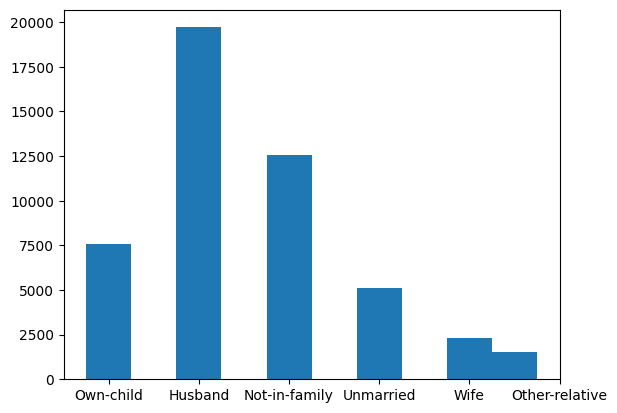

In [14]:
plot_categorical_distribution(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2b**: Write a function `plot_age_hours_scatter` that creates a scatter plot of 'age' vs 'hours-per-week', coloring points by 'income'.

In [15]:
def plot_age_hours_scatter(df:pd.DataFrame):
    color_map = {'<=50K':'Red', '>50K':'Blue'}
    plt.scatter(df['age'], df['hours-per-week'], c=df['income'].map(color_map))

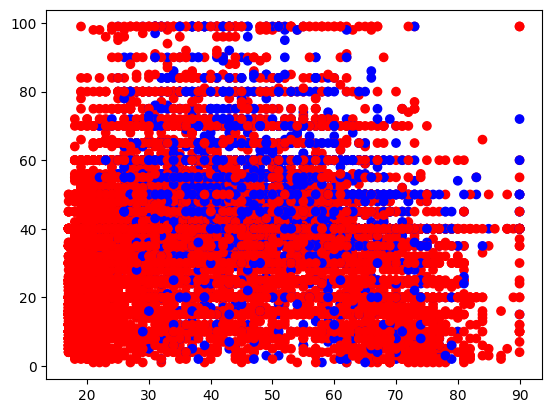

In [16]:
plot_age_hours_scatter(df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2c**: Write a function `plot_income_by_education` which plots a stacked bar chart that shows the proportion of income levels for each 'education' category.

In [17]:
def plot_income_by_education(df:pd.DataFrame):
    # Step 1: Group by 'education' and 'income', then count occurrences
    grouped_data = df.groupby(['education', 'income']).size().unstack(fill_value=0)
    
    # Step 2: Normalize the data to get proportions by row (education)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    
    # Step 3: Plot a stacked bar chart
    proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    
    # Step 4: Add title and labels
    plt.title('Proportion of Income Levels by Education Category')
    plt.xlabel('Education')
    plt.ylabel('Proportion')
    
    # Show the plot
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

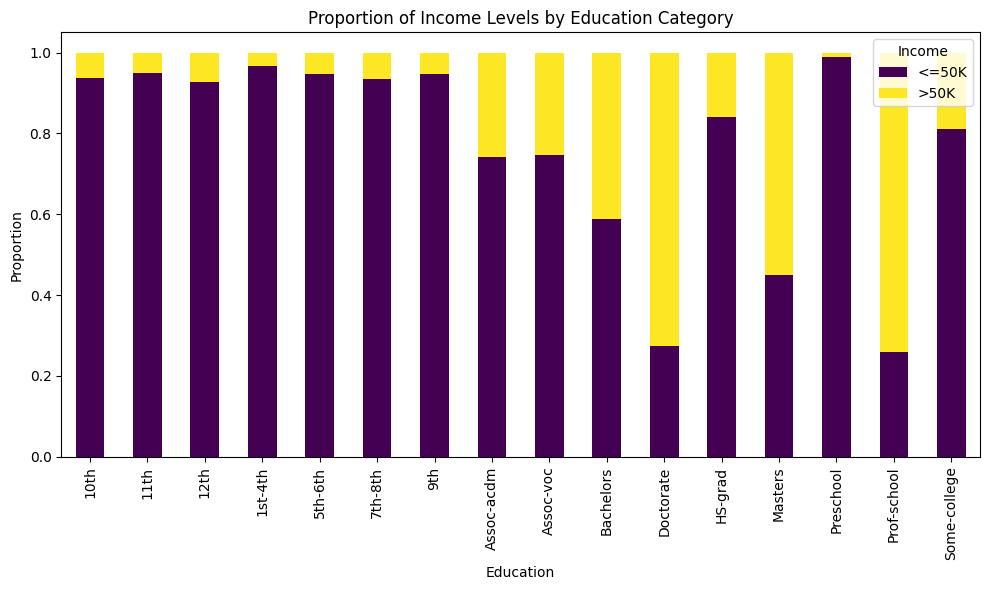

In [18]:
plot_income_by_education(df)

<!-- END QUESTION -->

## Part 3: Advanced Pandas Operations

**Question 3a**: Write a function `education_stats` that returns a dataframe with mean 'age' and median 'hours-per-week' categorized on the 'education' level.

In [19]:
def education_stats(df:pd.DataFrame):
    return df.groupby('education', as_index=False).aggregate({'age':'mean', 'hours-per-week':'median'})

In [20]:
grader.check("q3a")

q3a results: All test cases passed!

**Question 3b**: Write a function `calculate_high_income_percentage` that returns a dataframe of the percentage of individuals earning >50K for each 'native-country' and order them in descending order.

In [21]:
def calculate_high_income_percentage(df:pd.DataFrame):
    over50k = df[df['income']=='>50K'].groupby('native-country')['income'].count()
    each_group = df.groupby('native-country')['income'].count()
    each_group.sort_values(ascending=False)
    return 100*(over50k/each_group)

In [22]:
grader.check("q3b")

q3b results: All test cases passed!

**Question 3c**: Write a function `occupations_by_hours` that returns a dataframe of the top 5 occupations with the higheset average 'hours-per-week'.

In [23]:
def top_5_occupations_by_hours(df:pd.DataFrame):
    avg_hour_per_week = df.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)
    return avg_hour_per_week.head(5)


In [24]:
grader.check("q3c")

q3c results: All test cases passed!

## Scikit-learn

In [25]:
# MAKE SURE TO RUN THIS CELL!

import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_new = df.drop(columns=['native-country', 'fnlwgt']).dropna()

In this part, we'll implement [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit-learn. Logistic regression is used when trying to predict a binary outcome (0 or 1, True or False, etc.) We will go over the details of logistic regression in details later in the course. 

Here, we will try to predict income (>50k or <= 50k>) and follow standard ML procedures for data pre-processing. You can use scikit-learn's documentation, [the lecture notes on scikit-learn](https://tools4ds.github.io/DS701-Course-Notes/02C-Sklearn.html) or online resources for guidance. 

#### From here on use the 'df_new' variable instead of 'df'

We saw in lecture that models are trained on the 'training' set and evaluated on unseen data on the 'testing' set. The dataset has 'feature' (`X_train`, `X_test`) and the 'outcome' (`y_train`, `y_test`) variables. 

**Question 4a:** Write a function called `split_data` that takes a dataframe as its only parameter, splits it into training and test splits and returns them. Use 20% for the testing set. 

Use `train_test_split` to produce the splits. Provide a `random_state` of 42 for reproducibility.

`split_data` should return 4 things: X_train, X_test y_train and y_test. To do that, you need to pass in the X *and* the y (income column) to `train_test_split`.

In [26]:
def split_data(df):
    X_train, X_test, y_train, y_test = train_test_split(df_new.drop(columns='income'), df_new['income'], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = split_data(df_new)

In [28]:
grader.check("q4a")

q4a results: All test cases passed!

**Question 4b**: Write a function `preprocess_data` that takes X_train, y_train, X_test, and y_test as input (the splits we created earlier!) and does the following:

 - Scale the *numerical* columns using sklearn's `MinMaxScaler` to the range [0,1] for both train and test sets
  
 - Replace "<=50K" with 0 and ">50K" with 1 in both y_train and y_test

 - One-hot encode the categorical columns for both train and test sets. Check the next cell for some hints! 
  
The function should then return the preprocessed X_train, y_train, X_test, and y_test

Refer to the material below and [sklearn course notes](https://tools4ds.github.io/DS701-Course-Notes/02C-Sklearn.html#prepare-the-dataset) for help! 

One hot encoding is a way of turning textual data into numbers, so that models can work with them. 

Pandas has a method called `pd.get_dummies()` that can do one-hot encoding. Here's an example usage: 
  
   ```python
    # Sample DataFrame with categorical columns
    data = {'City': ['New York', 'Los Angeles', 'New York', 'Chicago'],
        'Gender': ['Female', 'Male', 'Male', 'Female']}

    df = pd.DataFrame(data) 

    df_encoded = pd.get_dummies(df, columns=['City', 'Gender']) # notice how I'm passing in the columns -- you should do this too! Hint: you wrote a function for this earlier. 
   ```
   
   And then `df_encoded` will look like: 

   ```python
      City_Chicago  City_Los Angeles  City_New York  Gender_Female  Gender_Male
    0             0                 0              1              1            0
    1             0                 1              0              0            1
    2             0                 0              1              0            1
    3             1                 0              0              1            0
   ```

   Notice how now every `City` value has its own column, and that every row with a city has a 1 for that city (row 1 in the old dataframe has New York for the `City`, and row in the new dataframe has a 1 for `City_New York`). Everywhere else you have a 0. 

In [29]:
def preprocess_data(X_train:pd.DataFrame, X_test, y_train, y_test):
    scale = MinMaxScaler()
    numerical_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']
    others = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender']
    X_train[numerical_cols] = scale.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scale.fit_transform(X_test[numerical_cols])
    # Transform `income` into numerical value.
    value_map = {'<=50K':0, '>50K':1}
    y_train = y_train.map(value_map)
    y_test = y_test.map(value_map)
    # get dummies
    res_x_train = pd.concat([X_train[numerical_cols], pd.get_dummies(X_train[others])], axis=1)
    res_x_test = pd.concat([X_test[numerical_cols], pd.get_dummies(X_test[others])], axis=1)
    return res_x_train, res_x_test, y_train, y_test

In [30]:
grader.check("q4b")

q4b results: All test cases passed!

Let's get to training! Remember, we're trying to predict whether income is more then 50k (>50k), or less than or equal to (<=50k).

**Question 4c:** Write a function called train_model that takes the training splits (X_train and y_train) as its parameters. 

- Initialize the logistic regression model
- Fit it to our data. (Training step)

At the end, return the fitted model. 

You can refer to [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [31]:
def train_model(X_train, y_train):
    logistic_model = LogisticRegression()
    logistic_model = logistic_model.fit(X_train, y_train)
    return logistic_model

In [32]:
grader.check("q4c")

q4c results: All test cases passed!

Let's evaluate the performance of our model! 

**Question 4d:** Write a function called evaluate_model that takes the fitted model and `X_test`, `y_test` as parameters, runs the model on the testing features (`X_test`) and returns the *accuracy score* of the predictions against the ground truth (`y_test`). 

You can refer to [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

In [33]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    return accuracy_score(y_true=y_test, y_pred=y_pred)
    

In [34]:
grader.check("q4d")

q4d results: All test cases passed!

## Submission

Submit the notebook after completing all the questions to Gradescope to view your results!